# Scoring functions for tracking

import standard libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import user code

In [5]:
import tracking
import transform

using simple DBSCAN clustering to have example tracks to work on

In [7]:
tracker = tracking.ClusterDBSCAN()

In [98]:
df = pd.read_csv("/Users/yetkin/ramp/trackML/generate/hits_train_00.csv")

In [99]:
y_df = df[['particle']]
X_df = df.drop(['hit','particle'], axis=1)

temporarily using same sample for training and testing

In [183]:
X_train_df = X_df.copy()
y_train_df = y_df.copy()
X_test_df = X_df.copy()
y_test_df = y_df.copy()

placeholder for training the ML algorithm

(in this case, just optimize clustering parameters)

In [184]:
tracker.fit(X_train_df.values, y_train_df.values)

find the tracks in the test sample

In [185]:
y_predicted = tracker.predict(X_test_df.values)

every hit is assigned to a single cluster, where the labels representing the clusters do not necessarily correspond to the particle labels in the training sample

In [186]:
y_predicted.size

985

In [187]:
y_test = y_test_df.values[:,0]

In [188]:
y_pred = y_predicted

In [130]:
len(np.unique(y_pred))

49

In [131]:
y_test.size

985

In [132]:
particle=8
true_hits = y_test[y_test[:] == particle]

In [133]:
true_hits

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [135]:
found_hits = y_pred[y_test[:] == particle]

In [136]:
found_hits

array([ 8,  9, 10, 11, -1, -1, -1, -1, -1, -1])

In [137]:
np.unique(y_test)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [138]:
nsubcluster=len(np.unique(found_hits[found_hits[:] >= 0]))

In [139]:
nsubcluster

4

In [140]:
np.bincount(found_hits[found_hits[:] >= 0])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [141]:
found_hits[found_hits[:] >= 0]

array([ 8,  9, 10, 11])

In [142]:
np.bincount(found_hits[found_hits[:] >= 0])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [143]:
maxcluster = np.argmax(np.bincount(found_hits[found_hits[:] >= 0]))

In [144]:
maxcluster

8

In [145]:
cmap = ['k','b','y','g','r']

In [146]:
foundtrack = 1
X_train_df.values[y_test[:] == foundtrack,0]

array([  913.8710925 ,  1883.32087365,  2893.2277171 ,  3927.57143491,
        4968.84961433,  5997.26506749,  6989.50859565,  7916.776184  ,
        8741.22449647,  9408.85273922])

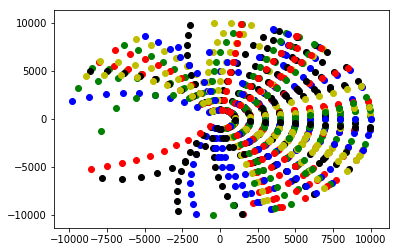

In [147]:
for foundtrack in np.unique(y_test):
    if foundtrack >= 0:
        plt.scatter(X_train_df.values[y_test[:] == foundtrack,0],X_train_df.values[y_test[:] == foundtrack,1],color=cmap[foundtrack % 5])
plt.show()

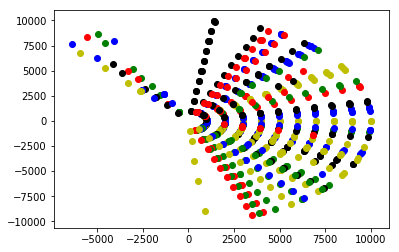

In [149]:
for foundtrack in np.unique(y_pred):
    if foundtrack >= 0:
        plt.scatter(X_train_df.values[y_pred[:] == foundtrack,0],X_train_df.values[y_pred[:] == foundtrack,1],color=cmap[foundtrack % 5])
plt.show()

In [173]:
hits_polar = transform.polar(X_train_df.values)
plt.xlim([-np.pi,np.pi])
plt.ylim([-0.,0.0011])

(-0.0, 0.0011)

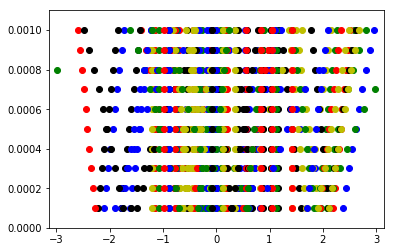

In [174]:
for foundtrack in np.unique(y_test):
    if foundtrack >= 0:
        plt.scatter(hits_polar[y_test[:] == foundtrack,1],hits_polar[y_test[:] == foundtrack,0],color=cmap[foundtrack % 5])
plt.show()

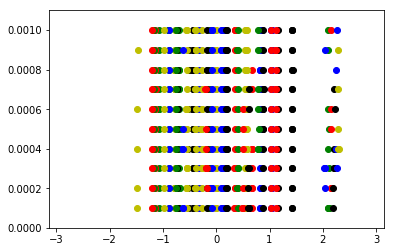

In [178]:
plt.xlim([-np.pi,np.pi])
plt.ylim([-0.,0.0011])
for foundtrack in np.unique(y_pred):
    if foundtrack >= 0:
        plt.scatter(hits_polar[y_pred[:] == foundtrack,1],hits_polar[y_pred[:] == foundtrack,0],color=cmap[foundtrack % 5])
plt.show()